In [6]:
import pandas as pd
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Sequencing report

In [19]:
def load_seqkit_report(fpath):
    """A function to load a seqkit summary """
    pdf = pd.read_csv(fpath, sep=r"\s+")
    
    columns = [
        'num_seqs',
        'sum_len',
        'min_len',
        'avg_len',
        'max_len',
        'Q1',
        'Q2',
        'Q3',
        'N50',
    ] 
    
    for c in columns:
        pdf[c] = pdf[c].astype(str).str.replace(',', '').astype(float)

    return pdf

fpath = "/scratch/indikar_root/indikar1/shared_data/single_cell/reports/seqkit/fastq.report.txt"

pdf = load_seqkit_report(fpath)
pdf['Gb'] = pdf['sum_len'] / 1e+9

columns = [
    'file',
    'num_seqs',
    'Gb',
    'avg_len',
    'N50',
]

pdf[columns].head()

# print(pdf[columns].round(1).astype(str).to_latex(index=False))

,file,num_seqs,Gb,avg_len,N50
0,o4b03.raw.fastq,785.0,0.000052,66.6,1106.0
1,o4b02.raw.fastq,3314.0,0.000282,85.2,583.0
2,o4b08.raw.fastq,1449.0,0.000095,65.7,456.0
3,o4b06.raw.fastq,8295.0,0.000229,27.6,98.0
4,o4b01.raw.fastq,16284.0,0.000593,36.4,69.0


In [28]:
pdf[pdf['file'] == "o4b03.raw.fastq"]

,file,format,type,num_seqs,sum_len,min_len,avg_len,max_len,Q1,Q2,Q3,sum_gap,N50,N50_num,Q20(%),Q30(%),AvgQual,GC(%),Gb
0,o4b03.raw.fastq,FASTQ,DNA,785.0,52285.0,1.0,66.6,2334.0,4.0,17.0,40.0,0,1106.0,18,44.77,19.25,10.59,48.46,0.000052


# Cis-trans

In [61]:
fpath = "/scratch/indikar_root/indikar1/shared_data/single_cell/reports/annotate/direct.cis_trans.csv"

df = pd.read_csv(fpath)
print(f"{df.shape=}")
df = df.sort_values(by='contact_type')
df = df.set_index('contact_type')
df = df.T
df['total'] = df.sum(axis=1)
df['percent_cis'] = df['cis'] / df['total']
df['sample'] = df.index.astype(str).str[:2] 
df['cell'] = df.index.astype(str).str[2:5] 
df = df.sort_values(by=['sample', 'cell'])

gx = df.groupby('sample').agg(
    total_cis = ('cis', 'sum'),
    total_trans = ('trans', 'sum'),
    mean_cis_ratio = ('percent_cis', 'mean'),
).reset_index()

gx.to_latex(index=False)

df.shape=(2, 381)


'\\begin{tabular}{lrrr}\n\\toprule\nsample & total_cis & total_trans & mean_cis_ratio \\\\\n\\midrule\no1 & 24834996 & 40377552 & 0.377324 \\\\\no2 & 720060 & 1008821 & 0.396199 \\\\\no3 & 20624082 & 15101365 & 0.438844 \\\\\no4 & 5839692 & 4495473 & 0.575527 \\\\\n\\bottomrule\n\\end{tabular}\n'

In [57]:
gx = df.groupby('sample').agg(
    total_cis = ('cis', 'sum'),
    total_trans = ('trans', 'sum'),
    mean_cis_ratio = ('percent_cis', 'mean'),
    std_cis_ratio = ('percent_cis', 'std'),
).reset_index()

gx

,sample,total_cis,total_trans,mean_cis_ratio,std_cis_ratio
0,o1,24834996,40377552,0.377324,0.070977
1,o2,720060,1008821,0.396199,0.074731
2,o3,20624082,15101365,0.438844,0.104984
3,o4,5839692,4495473,0.575527,0.063696


In [34]:
df['o4b03.GRCm39.summary.json'].sum()

919.0

# Mapping percent

In [12]:
fpath = "/scratch/indikar_root/indikar1/shared_data/single_cell/reports/mapping_percentage/expanded.csv"

df = pd.read_csv(fpath)

df['sample'] = df['basename'].astype(str).str[:2] 
df['cell'] = df['basename'].astype(str).str[2:5] 
df = df.sort_values(by=['sample', 'cell'])
df.head()


,basename,mapping_percentage,sample,cell
181,o1b01.GRCm39.txt,58.81,o1,b01
186,o1b02.GRCm39.txt,66.62,o1,b02
189,o1b03.GRCm39.txt,68.99,o1,b03
190,o1b04.GRCm39.txt,67.79,o1,b04
197,o1b05.GRCm39.txt,66.83,o1,b05


In [17]:
gx = df.groupby('sample').agg(
    average = ('mapping_percentage', 'mean'),
    median = ('mapping_percentage', 'median'),
).reset_index()

gx

,sample,average,median
0,o1,66.359271,66.845
1,o2,43.639565,55.615
2,o3,65.349479,70.365
3,o4,53.491667,73.870


Text(0, 0.5, 'n Cells')

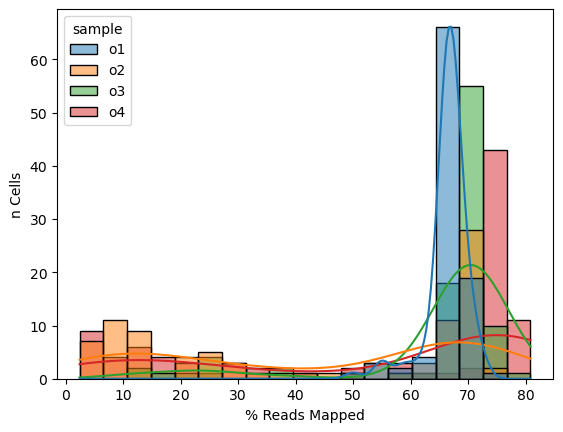

In [15]:
sns.histplot(data=df, 
             x='mapping_percentage',
             kde=True,
             hue='sample',)

plt.xlabel('% Reads Mapped')
plt.ylabel('n Cells')